## EDA de Reporte Agregado TLC:

### 1. Importar librerías:

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### 2. Abrir documentos y extraerlos de la web:

In [290]:
# URL del archivo CSV
url = "https://www.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv"

# Leer el archivo CSV desde la URL
df = pd.read_csv(url)

In [291]:
df

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2024-01,FHV - Black Car,"15,934",-,"7,915","7,882","3,088",12.1,4.0,12.2,4.0,26.0,-,-
1,2024-01,FHV - High Volume,"634,317",-,"84,472","83,778","57,143",21.1,6.4,21.4,6.3,18.0,-,"7,341"
2,2024-01,FHV - Livery,"24,657",-,"6,824","6,691","3,773",17.5,4.9,17.5,4.8,19.0,-,-
3,2024-01,FHV - Lux Limo,961,-,"1,433","1,380",498,11.2,1.9,11.1,1.9,62.0,-,-
4,2024-01,Green,"1,824","37,028",829,797,424,16.5,3.5,16.1,3.4,13.9,70%,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,0.0,35%,-
727,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,0.0,35%,-
728,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
729,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


Diccionario de datos:

### 3. Diccionario de datos:

| Métrica                                | Descripción                                                                                       |
|----------------------------------------|---------------------------------------------------------------------------------------------------|
| Month/Year                             | Mes/Año                                                                                           |
| License Class                          | La clase de licencia amplia utilizada para describir la industria                                |
| Trips Per Day                          | Número medio de viajes registrados cada día                                                       |
| Farebox Per Day                       | Importe total, en todos los vehículos, recaudado de todas las tarifas, recargos, impuestos y peajes. Nota: este monto no incluye montos de propinas de tarjetas de crédito. |
| Unique Drivers                        | El número único total de conductores únicos que registraron un viaje cada mes.               |
| Unique Vehicles                       | El número único total de taxis medallón/SHLS/FHV y vehículos de reserva* que registraron al menos un viaje en el mes |
| Vehicles Per Day                      | El número único promedio de taxis medallón/SHLS/FHV y vehículos de reserva* que registraron al menos un viaje en un día |
| Avg Days Vehicles on Road             | El número promedio de días que cada vehículo pasó en la carretera por mes.                        |
| Avg Hours Per Day Per Vehicle         | El promedio de horas en las que un vehículo registró un viaje.                                     |
| Avg Days Drivers on Road              | El número promedio de días que cada conductor registró un viaje.                                   |
| Avg Hours Per Day Per Driver          | El número promedio de horas por cada conductor                                                                  |
| Avg Minutes Per Trip                  | Tiempo promedio de viaje desde el medidor encendido hasta el medidor apagado                       |
| Percent of Trips Paid with Credit Card | Número de viajes en los que el pasajero pagó con tarjeta de crédito del número total de viajes    |
| Trips Per Day Shared                  | Número medio de viajes compartidos registrados cada día                                           |


### 4. Renombrar datos y filtrar solo UberLyft, Amarillos y Verdes:

In [292]:
df['License Class'].unique()

array(['FHV - Black Car', 'FHV - High Volume', 'FHV - Livery',
       'FHV - Lux Limo', 'Green', 'Yellow'], dtype=object)

In [293]:
# Filtrar el DataFrame por 'License Class' y renombrar valores
df_filtered = df[df['License Class'].isin(['FHV - High Volume', 'Green', 'Yellow'])]
df_filtered['License Class'] = df_filtered['License Class'].replace({'FHV - High Volume': 'UberLyft'})


In [294]:
df_filtered 

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
1,2024-01,UberLyft,"634,317",-,"84,472","83,778","57,143",21.1,6.4,21.4,6.3,18.0,-,"7,341"
4,2024-01,Green,"1,824","37,028",829,797,424,16.5,3.5,16.1,3.4,13.9,70%,-
5,2024-01,Yellow,"94,742","2,219,038","11,838","8,795","7,222",25.5,7.7,21.7,6.7,14.6,82%,-
7,2023-12,UberLyft,"661,812",-,"84,910","82,374","58,687",22.1,6.5,21.9,6.4,20.0,-,"6,264"
10,2023-12,Green,"2,071","45,896",860,825,469,17.6,3.5,17.2,3.5,15.8,69%,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,0.0,35%,-
727,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,0.0,35%,-
728,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
729,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


Revisar datos resumidos:

In [295]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 1 to 730
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Month/Year                              404 non-null    object 
 1   License Class                           404 non-null    object 
 2   Trips Per Day                           404 non-null    object 
 3   Farebox Per Day                         404 non-null    object 
 4   Unique Drivers                          404 non-null    object 
 5   Unique Vehicles                         404 non-null    object 
 6   Vehicles Per Day                        404 non-null    object 
 7   Avg Days Vehicles on Road               404 non-null    float64
 8   Avg Hours Per Day Per Vehicle           404 non-null    float64
 9   Avg Days Drivers on Road                404 non-null    float64
 10  Avg Hours Per Day Per Driver            404 non-null    float64
 11

Se observan que los tipos de datos están mal para algunos datos numéricos.

### 5. Corregir formato de valores y disminuir tamaño:

In [296]:
# Reemplazar el símbolo "%" por una cadena vacía en la columna "Percent of Trips Paid with Credit Card"
df_filtered['Percent of Trips Paid with Credit Card'] = df_filtered['Percent of Trips Paid with Credit Card'].str.replace('%', '')

# Reemplazar los guiones "-" con ceros en las columnas que deseas convertir a float32
columns_to_replace = ['Trips Per Day', 'Farebox Per Day',
       'Unique Drivers', 'Unique Vehicles', 'Vehicles Per Day',
       'Avg Days Vehicles on Road', 'Avg Hours Per Day Per Vehicle',
       'Avg Days Drivers on Road', 'Avg Hours Per Day Per Driver',
       'Avg Minutes Per Trip', 'Percent of Trips Paid with Credit Card',
       'Trips Per Day Shared']

for column in columns_to_replace:
    if df_filtered[column].dtype == 'object':  # Verificar si la columna es de tipo cadena
        df_filtered[column] = df_filtered[column].str.replace(',', '')

for column in columns_to_replace:
    df_filtered[column] = df_filtered[column].replace('-', '0')
    df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')  # Convertir a tipo float32, ignorando los errores de conversión

# Convertir los float64 a float32
df_filtered[['Avg Days Vehicles on Road', 'Avg Hours Per Day Per Vehicle', 'Avg Days Drivers on Road', 'Avg Hours Per Day Per Driver', 'Avg Minutes Per Trip']] = df_filtered[['Avg Days Vehicles on Road', 'Avg Hours Per Day Per Vehicle', 'Avg Days Drivers on Road', 'Avg Hours Per Day Per Driver', 'Avg Minutes Per Trip']].astype('float32')


df_filtered[['Trips Per Day', 'Farebox Per Day', 'Unique Drivers', 'Unique Vehicles', 'Vehicles Per Day', 'Percent of Trips Paid with Credit Card', 'Trips Per Day Shared']] = df_filtered[['Trips Per Day', 'Farebox Per Day', 'Unique Drivers', 'Unique Vehicles', 'Vehicles Per Day', 'Percent of Trips Paid with Credit Card', 'Trips Per Day Shared']].astype('float32')  # Convertir a float32


### 6. Revisar Outliers:

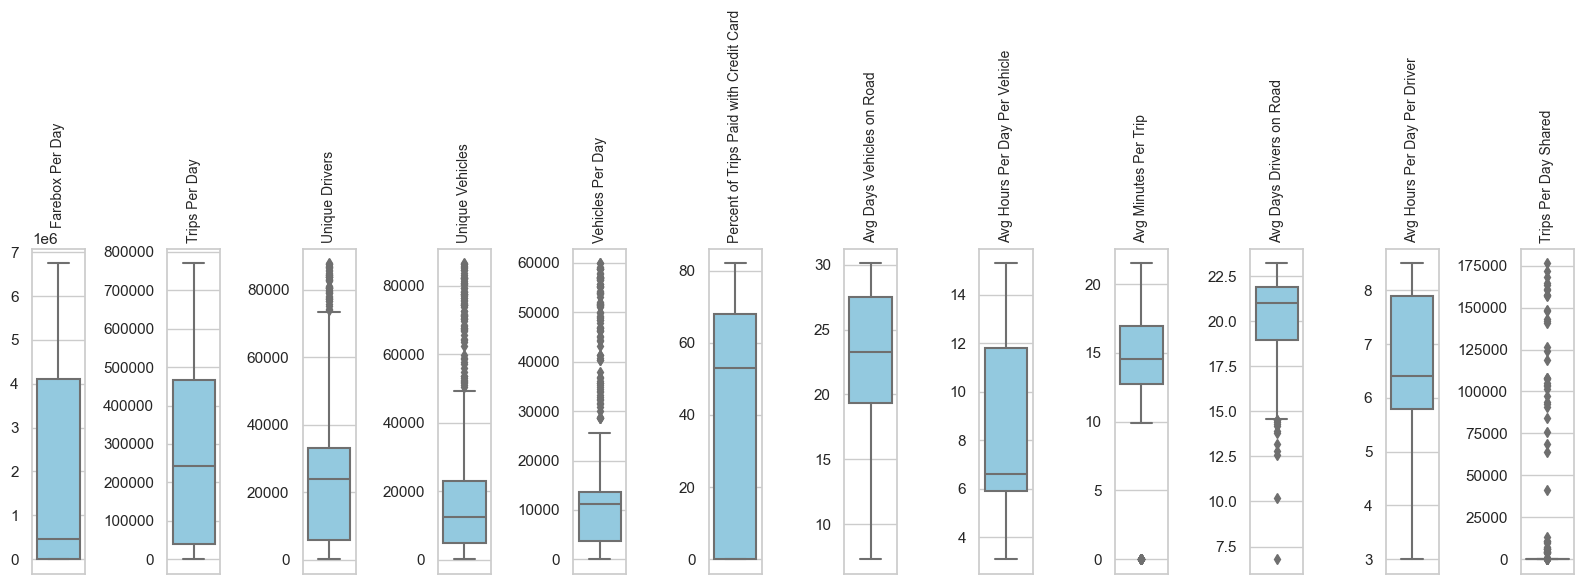

In [297]:
# Selecciona solo las columnas numéricas
df_numerical = df_filtered .select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

Se observan registros de tiempo de viaje en cero "0":

In [298]:
# Número de servicios con $mile sobre el umbral:
AVG_Minutes_Per_Trip_0 = (df_filtered['Avg Minutes Per Trip'] <= 0 ).sum()

print('registros con promedio de viaje en minutos en cero: ',AVG_Minutes_Per_Trip_0)

registros con promedio de viaje en minutos en cero:  35


### 7. Filtrar datos desde el 2020 en adelante:

Month/Year en esta columna el año viene separado del mes con "-" por ejemplo 2024-01 para indicar enero de 2024. Se requiere separar mes y año y solo dejar los registros de los años 2020 en adelante:

In [299]:
# Separar la columna "Month/Year" en "Year" y "Month"
df_filtered [['Year', 'Month']] = df_filtered ['Month/Year'].str.split('-', expand=True)

# Convertir las columnas "Year" y "Month" a tipo numérico
df_filtered ['Year'] = pd.to_numeric(df_filtered ['Year'])
df_filtered ['Month'] = pd.to_numeric(df_filtered ['Month'])

# Filtrar para incluir solo los registros a partir de 2020
df_filtered = df_filtered [df_filtered ['Year'] >= 2020]

# Convertir Year y Month a int16
df_filtered[['Year', 'Month']] = df_filtered[['Year', 'Month']].astype('int16')

# Filtrar para incluir solo los registros a partir de 2020
df_filtered = df_filtered[df_filtered['Year'] >= 2020]


Revisar de nuevo registros con tiempo == 0:

In [300]:
# Número de servicios con $mile sobre el umbral:
AVG_Minutes_Per_Trip_0 = (df_filtered['Avg Minutes Per Trip'] <= 0 ).sum()

print('registros con promedio de viaje en minutos en cero: ',AVG_Minutes_Per_Trip_0)

registros con promedio de viaje en minutos en cero:  0


### 8. Ordenar columnas e eliminar las que no serán necesarias:

In [301]:
# Definir las dimensiones de agrupación y las variables de agregación
dimensiones = [ 'Year', 'Month', 'License Class']
variables_agregacion = ['Unique Drivers', 'Unique Vehicles', 'Vehicles Per Day',
       'Avg Days Vehicles on Road', 'Avg Hours Per Day Per Vehicle',
       'Avg Days Drivers on Road', 'Avg Hours Per Day Per Driver',
       'Avg Minutes Per Trip', 'Percent of Trips Paid with Credit Card',
       'Trips Per Day Shared']

# Reordenar las columnas para que primero estén las dimensiones y luego las variables de agregación
columnas_ordenadas = dimensiones + variables_agregacion

# Reordenar el DataFrame agrupado
df_filtered = df_filtered[columnas_ordenadas]

No se incluirán las columnas 'Trips Per Day', 'Farebox Per Day' por ser campos que se calculan en el dataset de viajes y en el caso de Farebox no hay datos de Uber en este datwa set.

In [302]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 1 to 293
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    147 non-null    int16  
 1   Month                                   147 non-null    int16  
 2   License Class                           147 non-null    object 
 3   Unique Drivers                          147 non-null    float32
 4   Unique Vehicles                         147 non-null    float32
 5   Vehicles Per Day                        147 non-null    float32
 6   Avg Days Vehicles on Road               147 non-null    float32
 7   Avg Hours Per Day Per Vehicle           147 non-null    float32
 8   Avg Days Drivers on Road                147 non-null    float32
 9   Avg Hours Per Day Per Driver            147 non-null    float32
 10  Avg Minutes Per Trip                    147 non-null    float32
 11

### 9. EDA de los datos:

### 9.1. Datos Nulos:

In [303]:
df_filtered.isna().sum()

Year                                      0
Month                                     0
License Class                             0
Unique Drivers                            0
Unique Vehicles                           0
Vehicles Per Day                          0
Avg Days Vehicles on Road                 0
Avg Hours Per Day Per Vehicle             0
Avg Days Drivers on Road                  0
Avg Hours Per Day Per Driver              0
Avg Minutes Per Trip                      0
Percent of Trips Paid with Credit Card    0
Trips Per Day Shared                      0
dtype: int64

No hay datos nulos

### 9.2. Datos duplicados:

In [304]:
# Contar los valores duplicados en todas las columnas
duplicates_count = sum(df_filtered.duplicated())
print("Hay un total de ",duplicates_count," duplicados en los datos")

Hay un total de  0  duplicados en los datos


No hay duplicados

### 9.3. Revisión de valores únicos por columna:

In [305]:
Columnas=df_filtered.columns
for i in Columnas:
    print(i,": ",df_filtered[i].unique())
    print('------------------------------------')

Year :  [2024 2023 2022 2021 2020]
------------------------------------
Month :  [ 1 12 11 10  9  8  7  6  5  4  3  2]
------------------------------------
License Class :  ['UberLyft' 'Green' 'Yellow']
------------------------------------
Unique Drivers :  [84472.   829. 11838. 84910.   860. 12340. 84090.   876. 12257. 83791.
   900. 12232. 82812.   899. 11818. 80823.   886. 11442. 80592.   882.
 11396. 81025.   889. 11736. 80394.   922. 11661. 79657.   933. 11236.
 79004.   942. 11235. 77137.   928. 10762. 77641.   960. 10594. 78091.
   966. 10751. 77228.   958. 10804. 76651. 10737. 75194.   964. 10249.
 72640.   961.  9678. 73321.   977.  9843. 74020.  1040. 10101. 73287.
  1065.  9977. 72244.  1057.  9560. 71667.  1133.  9535. 68998.  1121.
  8989. 68531.  1162.  8803. 70302.  1299.  9552. 69410.  1311.  9516.
 68927.  9154. 65996.  1216.  8502. 59816.   944.  7471. 59733.   983.
  7350. 58802.  1001.  7089. 56874.   980.  6587. 54487.   954.  6102.
 52123.   952.  5765. 47208.   9

### 9.4. Descripción de los datos:

In [306]:
df_filtered.describe()

,Year,Month,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.00000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,2021.551020,6.387755,25667.843750,24250.197266,16388.408203,19.995237,6.27687,18.685715,5.889796,16.520409,48.748299,2348.551025
std,1.165624,3.516008,30675.382812,30169.126953,20361.658203,3.806904,2.00742,2.600553,1.628628,2.400740,35.029507,11531.410156
min,2020.000000,1.000000,669.000000,669.000000,278.000000,12.500000,3.10000,12.600000,3.000000,9.900000,0.000000,0.000000
25%,2021.000000,3.000000,1128.000000,1102.000000,556.500000,16.650001,4.10000,16.250000,4.100000,15.050000,0.000000,0.000000
50%,2022.000000,6.000000,9560.000000,7053.000000,5823.000000,19.799999,6.50000,19.200001,6.400000,16.500000,69.000000,0.000000
75%,2023.000000,9.000000,53752.500000,53354.000000,34029.500000,23.050000,7.90000,21.100000,7.100000,18.349999,76.500000,21.000000
max,2024.000000,12.000000,84910.000000,83778.000000,58734.000000,27.299999,10.80000,22.600000,8.500000,21.500000,82.000000,97117.000000


Estos datos son agregados, así que esta estadística no es válida para conclusiones en la información de los datos, pero sí para la calidad de los mismos.

### 9.5. Promedio mensual de los vehículos únicos por mes registrados en NYC:

<Figure size 1200x800 with 0 Axes>

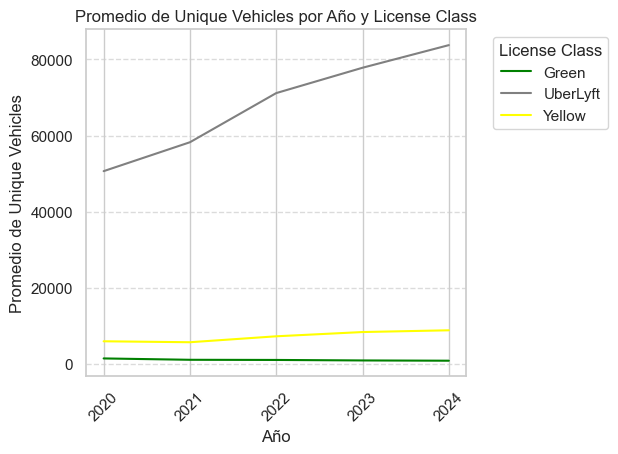

In [307]:
# Definir los colores para cada License Class
colors = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Agrupar los datos por año y License Class, y calcular el promedio de Unique Vehicles para cada combinación
mean_unique_vehicles_by_year_license = df_filtered.groupby(['Year', 'License Class'])['Unique Vehicles'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
mean_unique_vehicles_by_year_license.unstack().plot(kind='line', stacked=False, color=[colors.get(x, 'blue') for x in mean_unique_vehicles_by_year_license.unstack().columns])
plt.title('Promedio de Unique Vehicles por Año y License Class')
plt.xlabel('Año')
plt.ylabel('Promedio de Unique Vehicles')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='License Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()
plt.show()




### 9.5. Promedio mensual de los conductores únicos por mes que prestaron servicios de viajes en NYC:

<Figure size 1200x800 with 0 Axes>

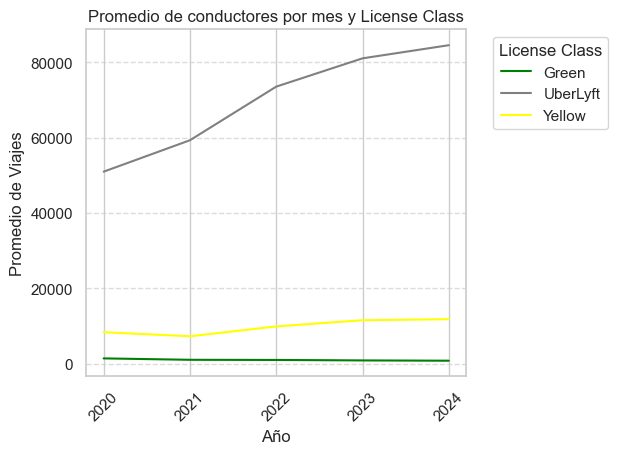

In [308]:
# Definir los colores para cada License Class
colors = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Agrupar los datos por año y License Class, y calcular el promedio de Unique Vehicles para cada combinación
mean_unique_travel = df_filtered.groupby(['Year', 'License Class'])['Unique Drivers'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
mean_unique_travel.unstack().plot(kind='line', stacked=False, color=[colors.get(x, 'blue') for x in mean_unique_travel.unstack().columns])
plt.title('Promedio de conductores por mes y License Class')
plt.xlabel('Año')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='License Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()
plt.show()

### 9.6. Promedio diario de vehículos únicos al servicio en NYC:

<Figure size 1200x800 with 0 Axes>

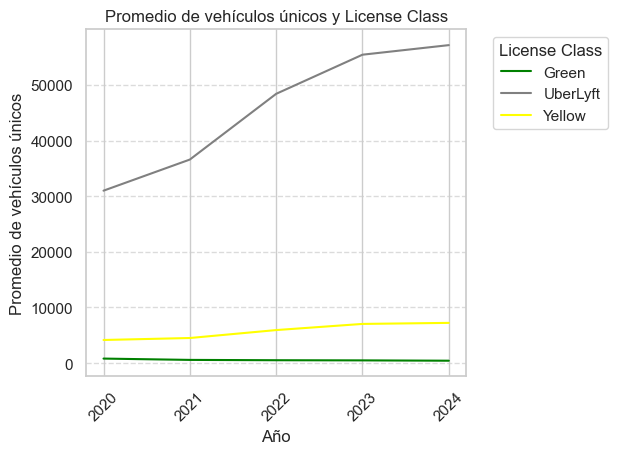

In [309]:
# Definir los colores para cada License Class
colors = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Agrupar los datos por año y License Class, y calcular el promedio de Unique Vehicles para cada combinación
mean_unique_travel = df_filtered.groupby(['Year', 'License Class'])['Vehicles Per Day'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
mean_unique_travel.unstack().plot(kind='line', stacked=False, color=[colors.get(x, 'blue') for x in mean_unique_travel.unstack().columns])
plt.title('Promedio de vehículos únicos y License Class')
plt.xlabel('Año')
plt.ylabel('Promedio de vehículos únicos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='License Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()
plt.show()

### 9.7. Promedio de horas trabajadas por día por vehículo:

<Figure size 1200x800 with 0 Axes>

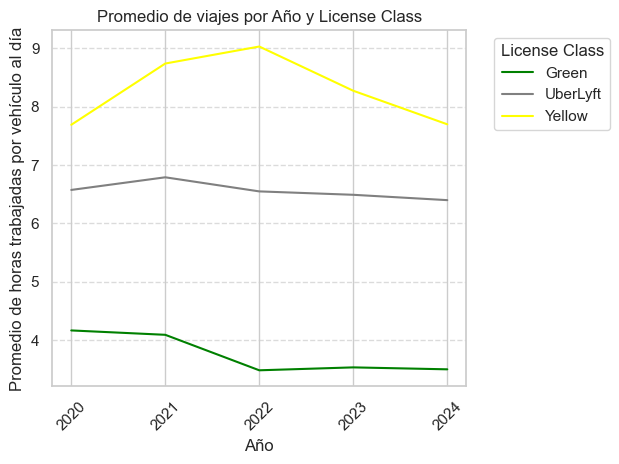

In [310]:
# Definir los colores para cada License Class
colors = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Agrupar los datos por año y License Class, y calcular el promedio de Unique Vehicles para cada combinación
mean_unique_travel = df_filtered.groupby(['Year', 'License Class'])['Avg Hours Per Day Per Vehicle'].mean()

# Convertir el índice del DataFrame a enteros
mean_unique_travel.index = mean_unique_travel.index.set_levels(mean_unique_travel.index.levels[0].astype(int), level=0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
mean_unique_travel.unstack().plot(kind='line', stacked=False, color=[colors.get(x, 'blue') for x in mean_unique_travel.unstack().columns])
plt.title('Promedio de viajes por Año y License Class')
plt.xlabel('Año')
plt.ylabel('Promedio de horas trabajadas por vehículo al día')
plt.xticks(range(min(mean_unique_travel.index.levels[0]), max(mean_unique_travel.index.levels[0]) + 1), rotation=45)  # Establecer ticks del eje x como años enteros
plt.legend(title='License Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()
plt.show()


### 9.8. Porcentaje de viajes pagados por tarjeta de crédito:

<Figure size 1200x800 with 0 Axes>

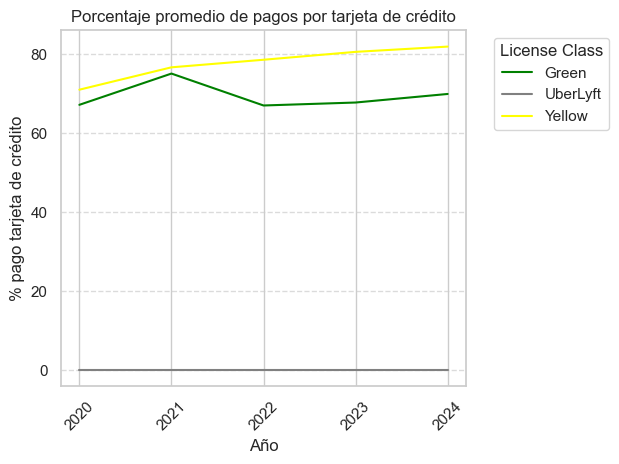

In [311]:
# Definir los colores para cada License Class
colors = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Agrupar los datos por año y License Class, y calcular el promedio de Unique Vehicles para cada combinación
mean_unique_travel = df_filtered.groupby(['Year', 'License Class'])['Percent of Trips Paid with Credit Card'].mean()

# Convertir el índice del DataFrame a enteros
mean_unique_travel.index = mean_unique_travel.index.set_levels(mean_unique_travel.index.levels[0].astype(int), level=0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
mean_unique_travel.unstack().plot(kind='line', stacked=False, color=[colors.get(x, 'blue') for x in mean_unique_travel.unstack().columns])
plt.title('Porcentaje promedio de pagos por tarjeta de crédito')
plt.xlabel('Año')
plt.ylabel('% pago tarjeta de crédito')
plt.xticks(range(min(mean_unique_travel.index.levels[0]), max(mean_unique_travel.index.levels[0]) + 1), rotation=45)  # Establecer ticks del eje x como años enteros
plt.legend(title='License Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()
plt.show()

### 9.9. Duracion promedio de viaje:

<Figure size 1200x800 with 0 Axes>

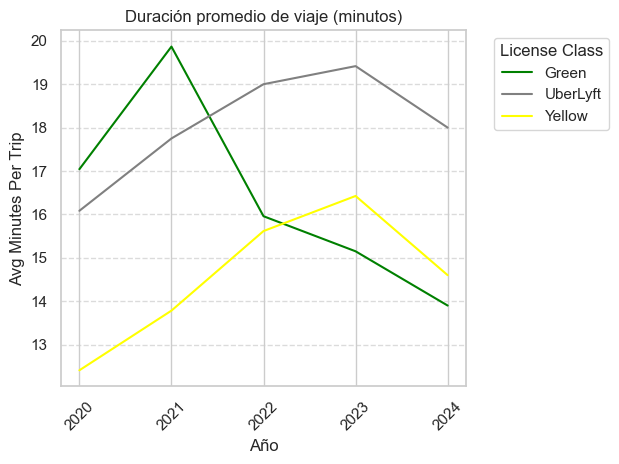

In [312]:
# Definir los colores para cada License Class
colors = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Agrupar los datos por año y License Class, y calcular el promedio de Unique Vehicles para cada combinación
mean_unique_travel = df_filtered.groupby(['Year', 'License Class'])['Avg Minutes Per Trip'].mean()

# Convertir el índice del DataFrame a enteros
mean_unique_travel.index = mean_unique_travel.index.set_levels(mean_unique_travel.index.levels[0].astype(int), level=0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
mean_unique_travel.unstack().plot(kind='line', stacked=False, color=[colors.get(x, 'blue') for x in mean_unique_travel.unstack().columns])
plt.title('Duración promedio de viaje (minutos)')
plt.xlabel('Año')
plt.ylabel('Avg Minutes Per Trip')
plt.xticks(range(min(mean_unique_travel.index.levels[0]), max(mean_unique_travel.index.levels[0]) + 1), rotation=45)  # Establecer ticks del eje x como años enteros
plt.legend(title='License Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()
plt.show()

### 10. Exportar archivo a parquet:

In [313]:
df_filtered.to_parquet('../DataClean/Aggregated_Reports.parquet')

In [314]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 1 to 293
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    147 non-null    int16  
 1   Month                                   147 non-null    int16  
 2   License Class                           147 non-null    object 
 3   Unique Drivers                          147 non-null    float32
 4   Unique Vehicles                         147 non-null    float32
 5   Vehicles Per Day                        147 non-null    float32
 6   Avg Days Vehicles on Road               147 non-null    float32
 7   Avg Hours Per Day Per Vehicle           147 non-null    float32
 8   Avg Days Drivers on Road                147 non-null    float32
 9   Avg Hours Per Day Per Driver            147 non-null    float32
 10  Avg Minutes Per Trip                    147 non-null    float32
 11